# Fase 4: Modeling - Regression (Numeric)

In [12]:
# Celda 1: Importar librerías y preparar datos

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing  import StandardScaler, RobustScaler
from sklearn.pipeline        import Pipeline
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.metrics         import r2_score, mean_squared_error, mean_absolute_error

# Cargar datos
data_path = '/Users/luissalamanca/Desktop/Duoc/Machine/ML_Proyecto_Semestral/data/03_features/engineered_data.csv'
data = pd.read_csv(data_path, sep=';')

# Separar columnas concatenadas
if len(data.columns) == 1:
    column_name = data.columns[0]
    if ',' in column_name:
        new_columns = column_name.split(',')
        data_split = data[column_name].str.split(',', expand=True)
        data_split.columns = new_columns
        for col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')
        data = data_split

# Lista de features y target
features = [
    'EconomicEfficiency',
    'EffectivenessScore',
    'EquipmentAdvantage',
    'KillAssistRatio',
    'StealthKillsRatio'
]
X = data[features]
y = data['KDA']

# Dividir en entrenamiento/prueba (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Escalamiento de características: StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convertir los arrays escalados en DataFrame para fácil indexación por nombre
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=features,
    index=X_train.index
)
X_test_scaled_df  = pd.DataFrame(
    X_test_scaled,
    columns=features,
    index=X_test.index
)

print("Formas de los datos:")
print(f"  X_train:           {X_train.shape}")
print(f"  X_test:            {X_test.shape}")
print(f"  X_train_scaled_df: {X_train_scaled_df.shape}")
print(f"  X_test_scaled_df:  {X_test_scaled_df.shape}")

Formas de los datos:
  X_train:           (55121, 5)
  X_test:            (23624, 5)
  X_train_scaled_df: (55121, 5)
  X_test_scaled_df:  (23624, 5)


In [39]:
X.describe()

,EconomicEfficiency,EffectivenessScore,EquipmentAdvantage,KillAssistRatio,StealthKillsRatio
count,78745.000000,78745.000000,78745.000000,78745.000000,78745.000000
mean,0.000362,1.379415,-12.343387,0.581777,0.064766
std,0.001076,1.536574,782.656301,0.724442,0.220792
min,0.000000,0.000000,-5220.000000,0.000000,0.000000
25%,0.000000,0.000000,-300.000000,0.000000,0.000000
50%,0.000000,1.000000,-20.000000,0.000000,0.000000
75%,0.000260,2.000000,280.000000,1.000000,0.000000
max,0.009950,5.000000,5240.000000,2.000000,1.000000


In [14]:
# Celda 2: Regresión Lineal Simple (usando solo la característica más correlacionada con KDA)

# 1) Calcular correlaciones absolutas entre cada feature y el target, usando SOLO el set de entrenamiento
corr_abs = X_train.corrwith(y_train).abs().sort_values(ascending=False)
best_feature = corr_abs.index[0]

print(f"Característica más correlacionada con KDA: {best_feature}")
print(f"Correlación absoluta: {corr_abs.iloc[0]:.4f}\n")

# 2) Definir X_simple y X_simple_test usando la feature seleccionada (sin escalar, para este caso)
X_simple       = X_train[[best_feature]]
X_simple_test  = X_test[[best_feature]]

# 3) Entrenar modelo de regresión lineal simple
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_train)

# 4) Predicción sobre el set de prueba
y_pred_simple = modelo_simple.predict(X_simple_test)

# 5) Calcular métricas
r2_simple   = r2_score(y_test, y_pred_simple)
mse_simple  = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple  = mean_absolute_error(y_test, y_pred_simple)

# 6) Mostrar resultados
print("=== REGRESIÓN LINEAL SIMPLE ===")
print(f"Característica utilizada: {best_feature}")
print(f"Coeficiente: {modelo_simple.coef_[0]:.4f}")
print(f"Intercepto: {modelo_simple.intercept_:.4f}")
print(f"R² (Coef. determinación): {r2_simple:.4f}")
print(f"MSE:  {mse_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")
print(f"MAE:  {mae_simple:.4f}")

Característica más correlacionada con KDA: EffectivenessScore
Correlación absoluta: 0.9238

=== REGRESIÓN LINEAL SIMPLE ===
Característica utilizada: EffectivenessScore
Coeficiente: 0.4301
Intercepto: -0.0064
R² (Coef. determinación): 0.8524
MSE:  0.0764
RMSE: 0.2764
MAE:  0.1731


In [15]:
# Celda 3: Regresión Lineal Múltiple (usando pipeline con StandardScaler)

pipeline_multiple = Pipeline([
    ('scaler', StandardScaler()),        # Escalar todas las features
    ('regressor', LinearRegression())     # Modelo de regresión lineal
])

# Ajustar en training set
pipeline_multiple.fit(X_train, y_train)

# Predecir en test set (el pipeline se encarga de escalar internamente)
y_pred_multiple = pipeline_multiple.predict(X_test)

# Métricas
r2_multiple   = r2_score(y_test, y_pred_multiple)
mse_multiple  = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
mae_multiple  = mean_absolute_error(y_test, y_pred_multiple)

# Coeficientes
coefs_multiple = pipeline_multiple['regressor'].coef_
intercept_multiple = pipeline_multiple['regressor'].intercept_

print("=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"Características utilizadas: {features}")
print("Coeficientes por característica:")
for feat, coef_val in zip(features, coefs_multiple):
    print(f"  {feat}: {coef_val:.4f}")
print(f"Intercepto: {intercept_multiple:.4f}")
print(f"R² (Coef. determinación): {r2_multiple:.4f}")
print(f"MSE:  {mse_multiple:.4f}")
print(f"RMSE: {rmse_multiple:.4f}")
print(f"MAE:  {mae_multiple:.4f}")

=== REGRESIÓN LINEAL MÚLTIPLE ===
Características utilizadas: ['EconomicEfficiency', 'EffectivenessScore', 'EquipmentAdvantage', 'KillAssistRatio', 'StealthKillsRatio']
Coeficientes por característica:
  EconomicEfficiency: -0.0187
  EffectivenessScore: 0.8059
  EquipmentAdvantage: -0.0008
  KillAssistRatio: -0.1498
  StealthKillsRatio: -0.0046
Intercepto: 0.5865
R² (Coef. determinación): 0.8611
MSE:  0.0719
RMSE: 0.2681
MAE:  0.1731


In [16]:
# Celda 4: SVR (Support Vector Regressor) con GridSearchCV

pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),   # Escalamos antes de SVR
    ('regressor', SVR())
])

# Definir malla de parámetros para SVR
param_svr = {
    'regressor__kernel':  ['rbf'],            # Solo RBF (puedes probar 'linear' o 'poly')
    'regressor__C':       [1, 10, 100],
    'regressor__gamma':   ['scale', 'auto'],
    'regressor__epsilon': [0.01, 0.1, 0.2]
}

gs_svr = GridSearchCV(
    estimator=pipeline_svr,
    param_grid=param_svr,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV
gs_svr.fit(X_train, y_train)

# Mejor modelo encontrado y sus predicciones
best_svr       = gs_svr.best_estimator_
y_pred_svr     = best_svr.predict(X_test)

# Métricas
r2_svr   = r2_score(y_test, y_pred_svr)
mse_svr  = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr  = mean_absolute_error(y_test, y_pred_svr)

print("\n=== SVR (Support Vector Regressor) ===")
print("Mejores hiperparámetros encontrados:")
print(gs_svr.best_params_)
print(f"R² (Coef. determinación): {r2_svr:.4f}")
print(f"MSE:  {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE:  {mae_svr:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== SVR (Support Vector Regressor) ===
Mejores hiperparámetros encontrados:
{'regressor__C': 100, 'regressor__epsilon': 0.1, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
R² (Coef. determinación): 0.8262
MSE:  0.0899
RMSE: 0.2999
MAE:  0.1939


In [17]:
# Celda 5: Árbol de Regresión con GridSearchCV

pipeline_tree = Pipeline([
    ('scaler', RobustScaler()),                # Uso RobustScaler para variables potencialmente con outliers
    ('regressor', DecisionTreeRegressor(random_state=42))
])

param_tree = {
    'regressor__max_depth':        [3, 5, 7, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf':  [1, 2, 4]
}

gs_tree = GridSearchCV(
    estimator=pipeline_tree,
    param_grid=param_tree,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV para Árbol
gs_tree.fit(X_train, y_train)

# Mejor modelo y predicción
best_tree   = gs_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Métricas
r2_tree   = r2_score(y_test, y_pred_tree)
mse_tree  = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree  = mean_absolute_error(y_test, y_pred_tree)

print("\n=== ÁRBOL DE REGRESIÓN ===")
print("Mejores hiperparámetros encontrados:")
print(gs_tree.best_params_)
print(f"R² (Coef. determinación): {r2_tree:.4f}")
print(f"MSE:  {mse_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")
print(f"MAE:  {mae_tree:.4f}")

# Importancia de características del mejor árbol (opcional)
importances = best_tree['regressor'].feature_importances_
print("\nImportancia de características (mejor Árbol):")
for feat, imp in zip(features, importances):
    print(f"  {feat}: {imp:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== ÁRBOL DE REGRESIÓN ===
Mejores hiperparámetros encontrados:
{'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
R² (Coef. determinación): 0.8660
MSE:  0.0693
RMSE: 0.2633
MAE:  0.1668

Importancia de características (mejor Árbol):
  EconomicEfficiency: 0.0034
  EffectivenessScore: 0.9959
  EquipmentAdvantage: 0.0007
  KillAssistRatio: 0.0000
  StealthKillsRatio: 0.0000


In [18]:
# Celda 6: Random Forest Regressor con GridSearchCV

pipeline_rf = Pipeline([
    ('scaler', RobustScaler()),                     # Aunque el RF no exige escala, lo incluimos por consistencia
    ('regressor', RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

param_rf = {
    'regressor__n_estimators':      [100, 200],
    'regressor__max_depth':         [None, 5, 10],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf':  [1, 2]
}

gs_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV para Random Forest
gs_rf.fit(X_train, y_train)

# Mejor modelo y predicción
best_rf   = gs_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Métricas
r2_rf   = r2_score(y_test, y_pred_rf)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)

print("\n=== RANDOM FOREST REGRESSOR ===")
print("Mejores hiperparámetros encontrados:")
print(gs_rf.best_params_)
print(f"R² (Coef. determinación): {r2_rf:.4f}")
print(f"MSE:  {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE:  {mae_rf:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== RANDOM FOREST REGRESSOR ===
Mejores hiperparámetros encontrados:
{'regressor__max_depth': 5, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
R² (Coef. determinación): 0.8666
MSE:  0.0690
RMSE: 0.2627
MAE:  0.1668


In [21]:
# Celda 7: Gradient Boosting Regressor con GridSearchCV

pipeline_gb = Pipeline([
    ('scaler', RobustScaler()),                   # Escalamos para mejorar convergencia
    ('regressor', GradientBoostingRegressor(
        random_state=42
    ))
])

param_gb = {
    'regressor__n_estimators':      [100, 200],
    'regressor__learning_rate':     [0.1, 0.05],
    'regressor__max_depth':         [3, 5],
    'regressor__min_samples_split': [2, 5]
}

gs_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_gb,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV para Gradient Boosting
gs_gb.fit(X_train, y_train)

# Mejor modelo y predicción
best_gb   = gs_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Métricas
r2_gb   = r2_score(y_test, y_pred_gb)
mse_gb  = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb  = mean_absolute_error(y_test, y_pred_gb)

print("\n=== GRADIENT BOOSTING REGRESSOR ===")
print("Mejores hiperparámetros encontrados:")
print(gs_gb.best_params_)
print(f"R² (Coef. determinación): {r2_gb:.4f}")
print(f"MSE:  {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE:  {mae_gb:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

=== GRADIENT BOOSTING REGRESSOR ===
Mejores hiperparámetros encontrados:
{'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
R² (Coef. determinación): 0.8668
MSE:  0.0689
RMSE: 0.2626
MAE:  0.1693


In [19]:
# Celda 8: MLPRegressor (red neuronal) con GridSearchCV

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),  # MLP requiere datos escalados
    ('regressor', MLPRegressor(
        max_iter=500,
        random_state=42
    ))
])

param_mlp = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'regressor__alpha':             [0.0001, 0.001],
    'regressor__learning_rate_init':[0.001, 0.01]
}

gs_mlp = GridSearchCV(
    estimator=pipeline_mlp,
    param_grid=param_mlp,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV para MLP
gs_mlp.fit(X_train, y_train)

# Mejor modelo y predicción
best_mlp   = gs_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

# Métricas
r2_mlp   = r2_score(y_test, y_pred_mlp)
mse_mlp  = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp  = mean_absolute_error(y_test, y_pred_mlp)

print("\n=== MLPREGRESSOR (Red Neuronal) ===")
print("Mejores hiperparámetros encontrados:")
print(gs_mlp.best_params_)
print(f"R² (Coef. determinación): {r2_mlp:.4f}")
print(f"MSE:  {mse_mlp:.4f}")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"MAE:  {mae_mlp:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== MLPREGRESSOR (Red Neuronal) ===
Mejores hiperparámetros encontrados:
{'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (50,), 'regressor__learning_rate_init': 0.001}
R² (Coef. determinación): 0.8661
MSE:  0.0693
RMSE: 0.2633
MAE:  0.1672


=== COMPARACIÓN DE TODOS LOS MODELOS ===
                       Modelo      R²     MSE    RMSE     MAE
0   Gradient Boosting (tuned)  0.8668  0.0689  0.2626  0.1693
1       Random Forest (tuned)  0.8666  0.0690  0.2627  0.1668
2        MLPRegressor (tuned)  0.8661  0.0693  0.2633  0.1672
3  Árbol de Regresión (tuned)  0.8660  0.0693  0.2633  0.1668
4   Regresión Lineal Múltiple  0.8611  0.0719  0.2681  0.1731
5     Regresión Lineal Simple  0.8524  0.0764  0.2764  0.1731
6                 SVR (tuned)  0.8262  0.0899  0.2999  0.1939


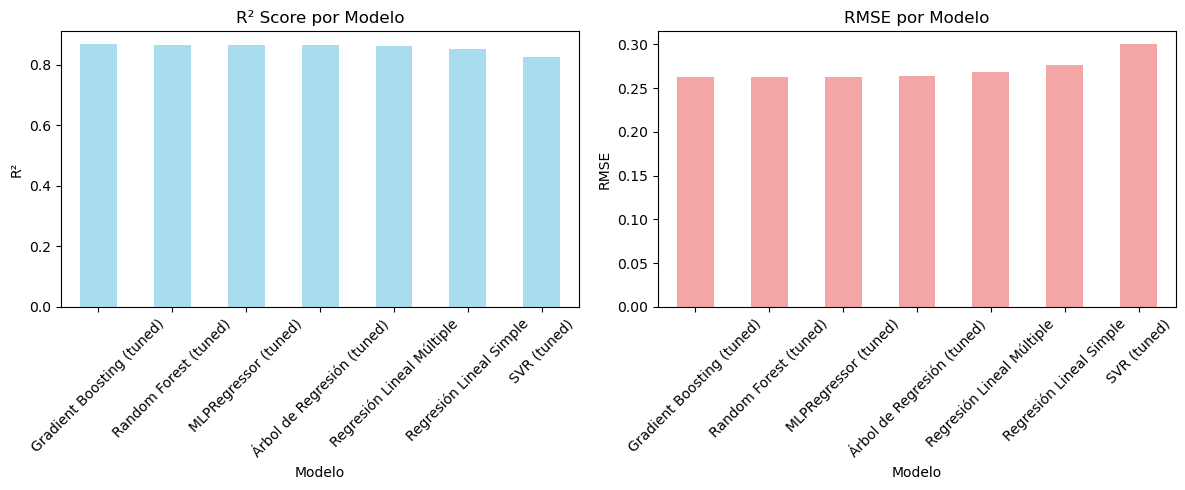

In [22]:
# Celda 9: Comparación final de métricas para todos los modelos

resultados = pd.DataFrame({
    'Modelo': [
        'Regresión Lineal Simple',
        'Regresión Lineal Múltiple',
        'SVR (tuned)',
        'Árbol de Regresión (tuned)',
        'Random Forest (tuned)',
        'Gradient Boosting (tuned)',
        'MLPRegressor (tuned)'
    ],
    'R²': [
        r2_simple,
        r2_multiple,
        r2_svr,
        r2_tree,
        r2_rf,
        r2_gb,
        r2_mlp
    ],
    'MSE': [
        mse_simple,
        mse_multiple,
        mse_svr,
        mse_tree,
        mse_rf,
        mse_gb,
        mse_mlp
    ],
    'RMSE': [
        rmse_simple,
        rmse_multiple,
        rmse_svr,
        rmse_tree,
        rmse_rf,
        rmse_gb,
        rmse_mlp
    ],
    'MAE': [
        mae_simple,
        mae_multiple,
        mae_svr,
        mae_tree,
        mae_rf,
        mae_gb,
        mae_mlp
    ]
})

# Ordenar de mayor a menor R²
resultados = resultados.sort_values('R²', ascending=False).reset_index(drop=True)

print("=== COMPARACIÓN DE TODOS LOS MODELOS ===")
print(resultados.round(4))

# Si quieres, también puedes graficar (opcional)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
resultados.plot(
    x='Modelo', y='R²',
    kind='bar', ax=ax[0], legend=False, color='skyblue', alpha=0.7
)
ax[0].set_title('R² Score por Modelo')
ax[0].set_ylabel('R²')
ax[0].tick_params(axis='x', rotation=45)

resultados.plot(
    x='Modelo', y='RMSE',
    kind='bar', ax=ax[1], legend=False, color='lightcoral', alpha=0.7
)
ax[1].set_title('RMSE por Modelo')
ax[1].set_ylabel('RMSE')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Mejor modelo según R²: Gradient Boosting (tuned)


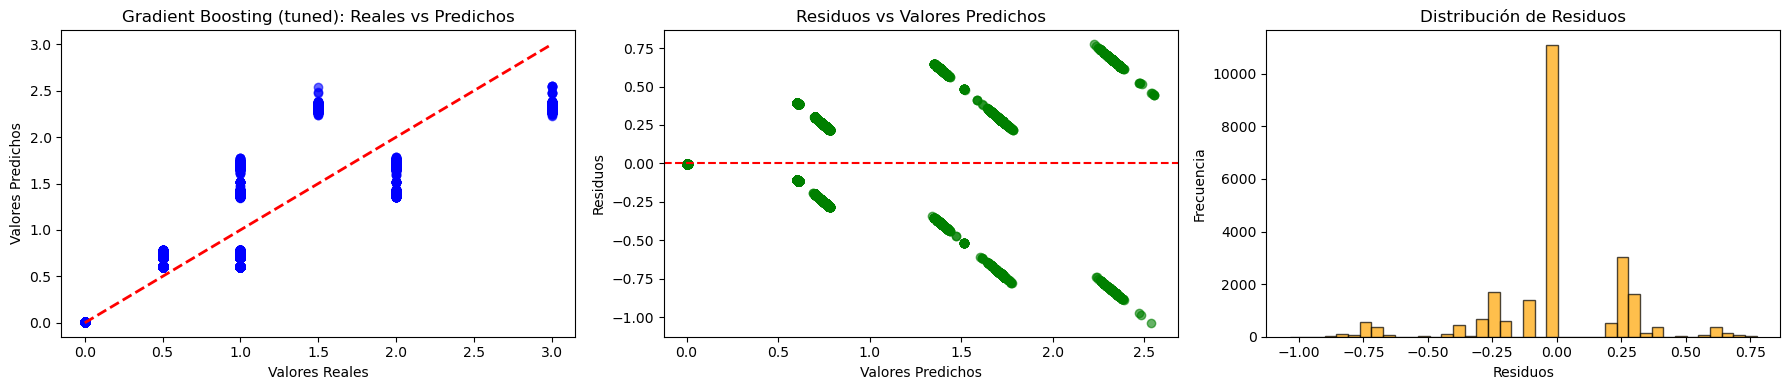


Estadísticas de residuos para Gradient Boosting (tuned):
  Media: -0.001265
  Desviación estándar: 0.2626
  Residuo mínimo: -1.0359
  Residuo máximo: 0.7748


In [23]:
# Celda 10: Análisis de Residuos para el Mejor Modelo

# 1) Identificar el mejor modelo en base a R²
mejor_idx        = resultados['R²'].idxmax()
mejor_modelo_nom = resultados.loc[mejor_idx, 'Modelo']
print(f"Mejor modelo según R²: {mejor_modelo_nom}")

# 2) Obtener las predicciones correspondientes
if mejor_modelo_nom == 'Regresión Lineal Simple':
    y_pred_mejor = y_pred_simple
elif mejor_modelo_nom == 'Regresión Lineal Múltiple':
    y_pred_mejor = y_pred_multiple
elif mejor_modelo_nom == 'SVR (tuned)':
    y_pred_mejor = y_pred_svr
elif mejor_modelo_nom == 'Árbol de Regresión (tuned)':
    y_pred_mejor = y_pred_tree
elif mejor_modelo_nom == 'Random Forest (tuned)':
    y_pred_mejor = y_pred_rf
elif mejor_modelo_nom == 'Gradient Boosting (tuned)':
    y_pred_mejor = y_pred_gb
else:  # 'MLPRegressor (tuned)'
    y_pred_mejor = y_pred_mlp

# 3) Calcular residuos
residuos = y_test - y_pred_mejor

# 4) Gráficos y estadísticas
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Valores Reales vs Predichos
axs[0].scatter(y_test, y_pred_mejor, alpha=0.6, color='blue')
axs[0].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2)
axs[0].set_xlabel('Valores Reales')
axs[0].set_ylabel('Valores Predichos')
axs[0].set_title(f'{mejor_modelo_nom}: Reales vs Predichos')

# Residuos vs Predichos
axs[1].scatter(y_pred_mejor, residuos, alpha=0.6, color='green')
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].set_xlabel('Valores Predichos')
axs[1].set_ylabel('Residuos')
axs[1].set_title('Residuos vs Valores Predichos')

# Histograma de residuos
axs[2].hist(residuos, bins=40, alpha=0.7, color='orange', edgecolor='black')
axs[2].set_xlabel('Residuos')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Distribución de Residuos')

plt.tight_layout()
plt.show()

# 5) Estadísticas básicas de residuos
print(f"\nEstadísticas de residuos para {mejor_modelo_nom}:")
print(f"  Media: {residuos.mean():.6f}")
print(f"  Desviación estándar: {residuos.std():.4f}")
print(f"  Residuo mínimo: {residuos.min():.4f}")
print(f"  Residuo máximo: {residuos.max():.4f}")

In [27]:
nuevos = pd.DataFrame({
    'EconomicEfficiency': [0.12],
    'EffectivenessScore': [-0.45],
    'EquipmentAdvantage': [130],
    'KillAssistRatio':    [0.78],
    'StealthKillsRatio':  [0.05]
})

In [28]:
nuevos_scaled = scaler.transform(nuevos)           # 👈 importante: ¡NO vuelvas a fit!

In [31]:
print("Columna usada por modelo_simple:", modelo_simple.feature_names_in_)
# → te devolverá algo como ['EffectivenessScore']

Columna usada por modelo_simple: ['EffectivenessScore']


In [34]:
# Valor de esa característica sin escalar
nuevo_valor = -0.45          # <-- cámbialo por el que quieras probar

nuevo_sample = pd.DataFrame({
    modelo_simple.feature_names_in_[0]: [nuevo_valor]
})

# Predicción
y_pred = modelo_simple.predict(nuevo_sample)
print(f"KDA predicho (modelo simple): {y_pred[0]:.3f}")

KDA predicho (modelo simple): -0.200


In [33]:
kda_pred = max(0, y_pred[0])